In [1]:
# Move the downloaded files to the same working directory.
# The downloaded files are in .txt form, convert them to .csv to work with ease.

# Import Pandas, Numpy to read the dataframes  and Seaborn to visualize the results.
import pandas as pd
import numpy as np
import seaborn as sns

# Read the text files into a dataframe. 
# Dlimiter to seperate the values.
df1 = pd.read_csv('matrix1.txt', delimiter=',')
df2 = pd.read_csv('matrix2.txt', delimiter=',')

# Write to a new CSV file. both the .txt files are converted to .csv files and are present in the same working directory
df1.to_csv('matrix1.csv', index=False)
df2.to_csv('matrix2.csv', index=False)

# matrix1.csv and matrix2.csv are read into dataframes.
df1 = pd.read_csv('matrix1.csv', delimiter='\t')
df2 = pd.read_csv('matrix2.csv', delimiter='\t')



                bladder  breast_cancer  cervical  head n neck      KIRC  \
bladder        1.000000       0.599523  0.634296     0.963368  0.725427   
breast_cancer  0.599523       1.000000  0.817857     0.436347  0.819293   
cervical       0.634296       0.817857  1.000000     0.520650  0.740528   
head n neck    0.963368       0.436347  0.520650     1.000000  0.659066   
KIRC           0.725427       0.819293  0.740528     0.659066  1.000000   
KIRP           0.342192       0.794081  0.750458     0.246662  0.729723   
LUAD           0.862249       0.761040  0.880549     0.790977  0.778040   
LUSC           0.690401       0.841805  0.833315     0.537158  0.725342   
PRAD           0.895310       0.451565  0.478204     0.917496  0.758492   
STAD           0.957167       0.455907  0.528248     0.992209  0.686506   
THCA           0.404031       0.781363  0.460994     0.309508  0.761811   
UCEC           0.655229       0.896039  0.821949     0.510117  0.834949   
Unnamed: 13         NaN  

<Axes: >

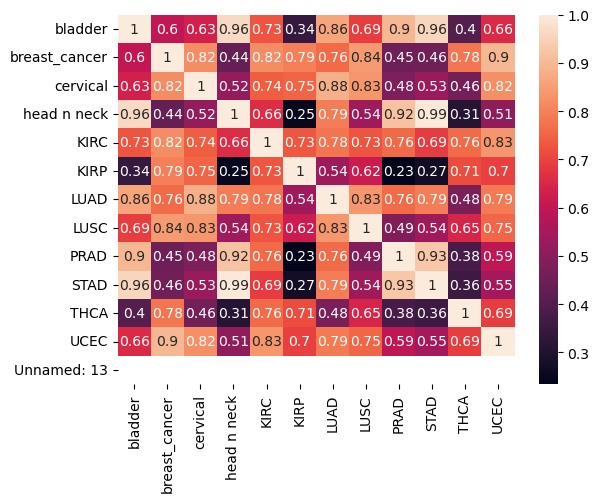

In [2]:
# Calculate the Pearson correlation matrix for matrix1.csv 
correlation_matrix = df1.corr(numeric_only=True)

# Drop the Unnamed :13 column, because it contains NaN values.
correlation_matrix.drop("Unnamed: 13", axis=1, inplace=True)

# 12*12 matrix after dropping the Unnamed :13 Column.
print (correlation_matrix)

# Heatmap for the correlation_matrix, along with the annotations.
sns.heatmap(correlation_matrix,annot=True)

                bladder  breast_cancer  cervical  head n neck      KIRC  \
bladder        1.000000       0.212732  0.589067     0.149967  0.162164   
breast_cancer  0.212732       1.000000  0.863513     0.931682  0.872940   
cervical       0.589067       0.863513  1.000000     0.885528  0.735477   
head n neck    0.149967       0.931682  0.885528     1.000000  0.808541   
KIRC           0.162164       0.872940  0.735477     0.808541  1.000000   
KIRP           0.326079       0.366644  0.294024     0.181031  0.693256   
LUAD           0.665509       0.847675  0.975662     0.809941  0.709959   
LUSC           0.255758       0.947829  0.896586     0.954687  0.795664   
PRAD           0.996032       0.284830  0.645493     0.220799  0.225755   
STAD           0.963659       0.317559  0.634084     0.223279  0.274682   
THCA           0.672036       0.826725  0.910494     0.727526  0.755754   
UCEC           0.869132       0.333219  0.631045     0.279772  0.461262   
Unnamed: 13         NaN  

<Axes: >

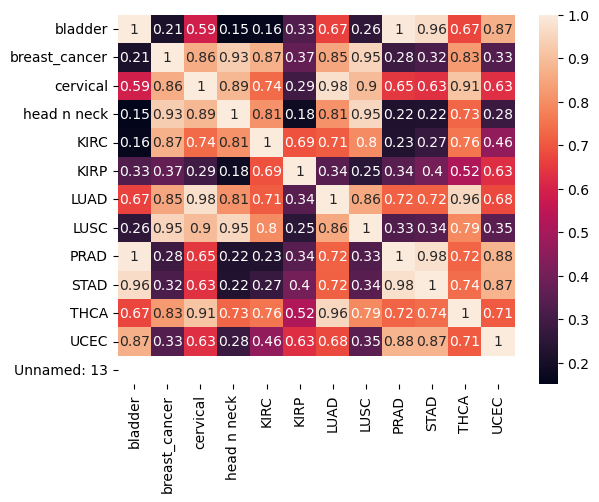

In [3]:
# Calculate the Pearson correlation matrix for matrix2.csv
correlation_matrix = df2.corr(numeric_only=True)

# Drop the Unnamed :13 column, because it contains NaN values.
correlation_matrix.drop("Unnamed: 13", axis=1, inplace=True)

# 12*12 matrix after dropping the Unnamed :13 Column.
print (correlation_matrix)

# Heatmap for the correlation_matrix, along with the annotations.
sns.heatmap(correlation_matrix,annot=True)

<Axes: >

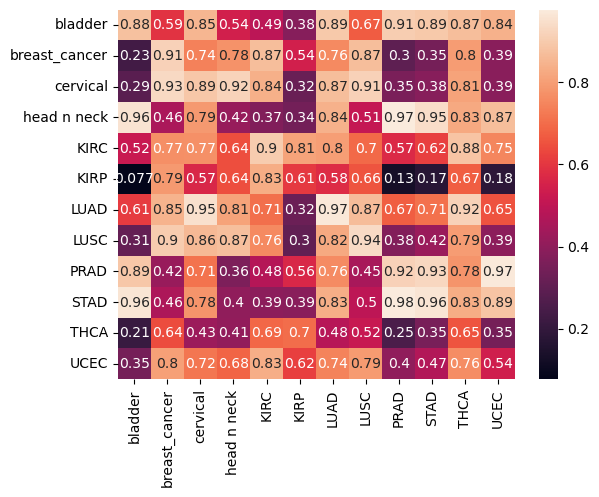

In [4]:
# Load the data for matrix 1 and drop miRNA beacuse it contains non numerical values and Unnamed: 13 beacuse it has NaN values in it.
df1.drop(['miRNA','Unnamed: 13'], inplace=True, axis=1)

# Calculate the Pearson correlation for matrix 1
correlation_matrix1 = df1.corr()

# Load the data for matrix 2 and drop miRNA beacuse it contains non numerical values and Unnamed: 13 beacuse it has NaN values in it.
df2 = pd.read_csv('matrix2.csv', delimiter='\t')
df2.drop(['miRNA','Unnamed: 13'], inplace=True, axis=1)

# Calculate the Pearson correlation matrix for matrix 2
correlation_matrix2 = df2.corr()

# Check the columns are in the same order for both matrix1 and matrix2
correlation_matrix1 = correlation_matrix1.reindex(columns=correlation_matrix2.columns)

# Calculate the  Pearson correlation for each pair of corresponding columns of both matrix1 and matrix2.
finalCorrelations = pd.DataFrame(index=df1.columns, columns=df2.columns)
for column1 in correlation_matrix1.columns:
    for column2 in correlation_matrix2.columns:
        corr = np.corrcoef(df1[column1], df2[column2])[0,1]
        finalCorrelations.loc[column1, column2] = corr

# Generate the heatmap for the computed pearson correlation.   
finalCorrelations = finalCorrelations.astype(float)
sns.heatmap(finalCorrelations, annot=True)